## Linear Model Assumptions

Linear models make the following assumptions over the independent variables X, used to predict Y:

- There is a linear relationship between X and the outcome Y
- The independent variables X are normally distributed
- There is no or little co-linearity among the independent variables
- Homoscedasticity (homogeneity of variance)

Examples of linear models are:

- Linear and Logistic Regression
- Linear Discriminant Analysis (LDA)
- Principal Component Regressors

### Definitions:

**Linear relationship** describes a relationship between the independent variables X and the target Y that is given by:
Y ≈ β0 + β1X1 + β2X2 + ... + βnXn.

**Normality** means that every variable X follows a Gaussian distribution.

**Multi-colinearity** refers to the correlation of one independent variable with another. Variables should not be correlated.

**Homoscedasticity**, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables.


**Failure to meet one or more of the model assumptions may end up in a poor model performance**. If the assumptions are not met, we can try a different machine learning model or transform the input variables so that they fulfill the assumptions.


### How can we evaluate if the assumptions are met by the variables?

- Linear regression can be assessed by scatter-plots and residuals plots
- Normal distribution can be assessed by Q-Q plots
- Multi-colinearity can be assessed by correlation matrices
- Homoscedasticity can be assessed by residuals plots


### What can we do if the assumptions are not met?

Sometimes variable transformation can help the variables meet the model assumptions. We normally do 1 of 2 things:

- Mathematical transformation of the variables
- Discretisation


## In this demo...

We will learn how to do:
- Scatter plots and residual plots to visualise linear relationships
- Q-Q plots for normality
- Correlation matrices to determine co-linearity
- Residual plots for homoscedasticity

We will compare the expected plots (how the plots should look like if the assumptions are met) obtained from simulated data.

In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import pylab
import scipy.stats as stats

# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standarize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [2]:
columns = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'car name']
data = pd.read_csv('C:\\Users\gusal\\machine learning\\Feature engineering\\auto-mpg.data-rev3.txt', usecols = columns)

In [3]:
data.tail(5)

,mpg,displacement,horsepower,weight,acceleration,model year,car name
387,27.0,140.0,86.0,2790.0,15.6,82.0,ford mustang gl
388,44.0,97.0,52.0,2130.0,24.6,82.0,vw pickup
389,32.0,135.0,84.0,2295.0,11.6,82.0,dodge rampage
390,28.0,120.0,79.0,2625.0,18.6,82.0,ford ranger
391,31.0,119.0,82.0,2720.0,19.4,82.0,chevy s-10


In [4]:
data.shape

(392, 7)

In [5]:
# this is the information about a car dataset
# get familiar with the variables before continuing with 
# the notebook

# the aim is to predict mpg "miles per galon"

# and we have variables with characteristics about
# the car


### Simulation data for the examples

## Linear Assumption

We evaluate linear assumption with scatter plots and residual plots. Scatter plots plot the change in the dependent variable y with the independent variables x1, x2 and x3.

### Scatter plots

In [6]:
# I will create a dataframe with the variable x that
# follows a normal distribution and shows a
# linear relationship with y

# this will provide the expected plots
# i.e., how the plots should look like if the
# assumptions are met

np.random.random(1)[0]

n = 250
noise = np.random.random(n)/2

x1 = np.random.randn(n)
x2 = np.random.randn(n)
x3 = np.random.randn(n)
y = x1 + x2 + (x3*10) + 10 + noise

In [124]:
df = pd.DataFrame([x1, x2, x3, y]).T
df.columns = ['x1','x2', 'x3', 'y']


In [125]:
df.head(3)

,x1,x2,x3,y
0,1.635698,0.272862,1.951401,31.662207
1,0.302991,-0.797581,0.159821,11.373302
2,-0.663180,0.907330,-1.062914,-0.147811


In [121]:
df.shape

(250, 4)

Text(0.5, 6.79999999999999, 'Independent variable')

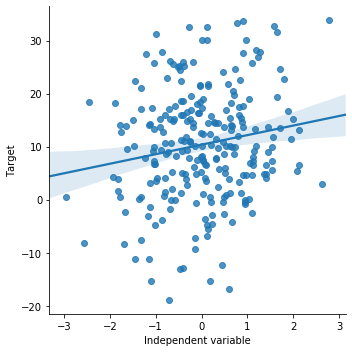

In [9]:
# for the simulated data

# this is how the plot looks like when
# there is a linear relationship

sns.lmplot(x="x1", y="y", data=df, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y

plt.ylabel('Target')
plt.xlabel('Independent variable')

Text(0.5, 6.79999999999999, 'Independent variable')

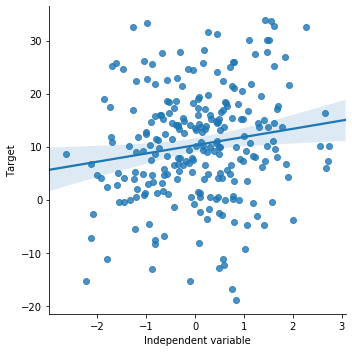

In [10]:
# for the simulated data

# this is how the plot looks like when
# there is a linear relationship

sns.lmplot(x="x2", y="y", data=df, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y

plt.ylabel('Target')
plt.xlabel('Independent variable')

Text(0.5, 6.79999999999999, 'Independent variable')

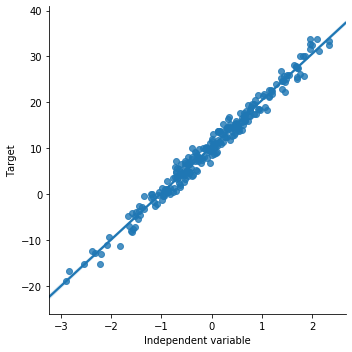

In [11]:
# for the simulated data

# this is how the plot looks like when
# there is a linear relationship

sns.lmplot(x="x3", y="y", data=df, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y

plt.ylabel('Target')
plt.xlabel('Independent variable')

Among x1, x2 and x3; x3 shows the most clear linear relationship with y


In [12]:
data.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'car name'],
      dtype='object')

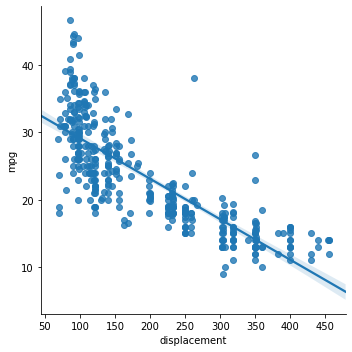

In [13]:
# now we make a scatter plot for the cars miles

# we plot displacement
# vs mpg (miles per galon)

sns.lmplot(x="displacement", y="mpg", data = data, order=1)

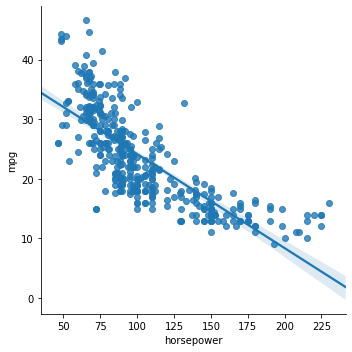

In [14]:
# now we make a scatter plot for the cars miles

# we plot horsepower
# vs mpg (miles per galon)

sns.lmplot(x="horsepower", y="mpg", data = data, order=1)

The relationship between horsepower and mpg is quite linear apart from a few values around the minimal values of horsepower, towards the top left side of the plot.

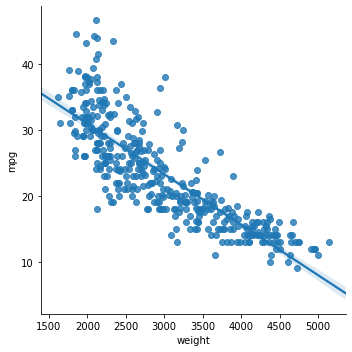

In [15]:
# now we make a scatter plot for the cars miles

# we plot weight
# vs mpg (miles per galon)

sns.lmplot(x="weight", y="mpg", data = data, order=1)

The relationship between weight and mpg is quite linear apart from a few values around the minimal values of weight, towards the top left side of the plot.

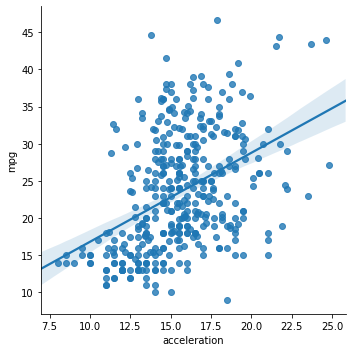

In [16]:
# now we make a scatter plot for the cars miles

# we plot acceleration
# vs mpg (miles per galon)

sns.lmplot(x="acceleration", y="mpg", data = data, order=1)

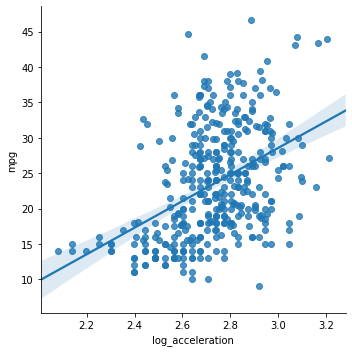

In [17]:
# apply a log transformation of displacement
data['log_acceleration'] = np.log(data['acceleration'])

# plot the transformed CRIM variable vs MEDV
sns.lmplot(x="log_acceleration", y="mpg", data=data, order=1)

The relationship is clearly not linear between acceleration and mpg. Sometimes, a transformation of mpg helps improve the linear relationship. See below.

dropping log_acceleration

In [87]:
data = data.drop(['log_acceleration'], axis = 1)

In [88]:
data.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'car name'],
      dtype='object')

### Assessing linear relationship by examining the residuals (errors)

Another thing that we can do to determine whether there is a linear relationship between the variable and the target is to evaluate the distribution of the errors, or the residuals. The residuals refer to the difference between the predictions and the real value of the target. It is performed as follows:

1) make a linear regression model using the desired variables (X)

2) obtain the predictions 

3) determine the error (True mpg - predicted mpg)

4) observe the distribution of the error.

If the mpg, is linearly explained by the variables we are evaluating, then the error should be random noise, and should typically follow a normal distribution centered at 0. We expect to see the error terms for each observation lying around 0.

We will do this first, for the simulated data, to become familiar with how the plots should look like. Then we will do the same for acceleration and then, we will transform acceleration to see how transformation affects the residuals and the linear fit.

Text(0, 0.5, 'Real value')

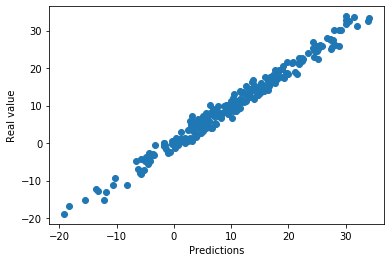

In [19]:
# SIMULATED DATA

# step 1: make a linear model
# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(df['x3'].to_frame(), df['y'])

# step 2: obtain the predictions
# make the predictions
pred = linreg.predict(df['x3'].to_frame())

# step 3: calculate the residuals
error = df['y'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=df['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

The model makes good predictions. The predictions are quite aligned with the real value of the target.

Text(0.5, 0, 'Independent variable x')

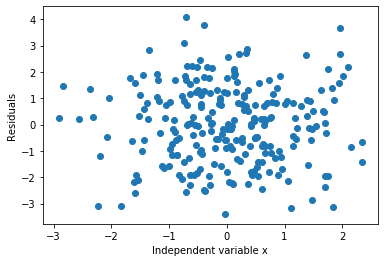

In [20]:
# step 4: observe the distribution of the errors

# Residuals plot
# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

# we plot the error terms vs the independent variable x3
# error values should be around 0 and homogeneously distributed

plt.scatter(y=error, x=df['x3'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

The errors are distributed around 0, as expected.

Text(0.5, 0, 'Residuals')

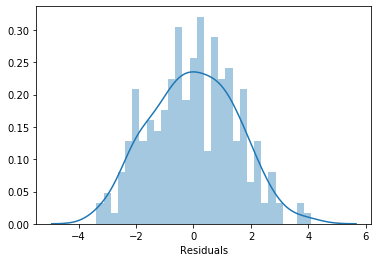

In [21]:
# step 4: observe the distribution of the errors

# plot a histogram of the residuals
# they should follow a gaussian distribution
# centered around 0

sns.distplot(error, bins=30)
plt.xlabel('Residuals')

The errors adopt a Gaussian distribution and it is centered around 0. So it meets the assumptions, as expected.

Let's do the same for acceleration.

Text(0, 0.5, 'mpg')

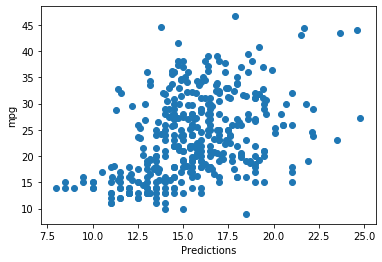

In [22]:
# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(data['acceleration'].to_frame(), data['acceleration'])

# make the predictions
pred = linreg.predict(data['acceleration'].to_frame())

# calculate the residuals
error = data['mpg'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=data['mpg'])
plt.xlabel('Predictions')
plt.ylabel('mpg')

the model does not predict very well. 

Text(0.5, 0, 'acceleration')

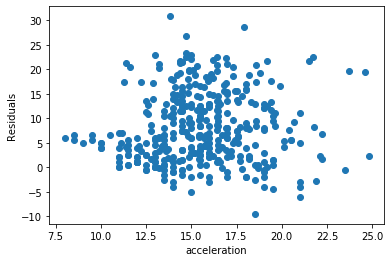

In [23]:
# Residuals plot

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(y=error, x=data['acceleration'])
plt.ylabel('Residuals')
plt.xlabel('acceleration')

The residuals are not really centered around zero. And the errors are not homogeneously distributed across the values of acceleration. medium and high values of acceleration show higher errors. 

The relationship could be improved.

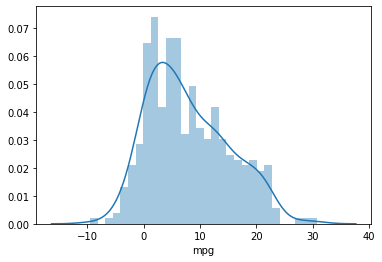

In [24]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)

The residuals are not centered around zero, and the distribution is not totally Gaussian, it is skewed to the right.  Can we improve the fit by transforming acceleration?

Text(0, 0.5, 'mpg')

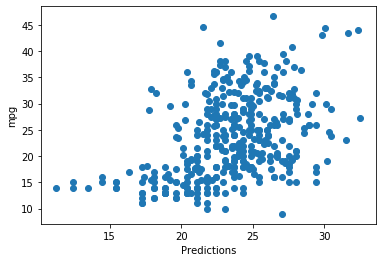

In [25]:
# let's repeat the exercise but fitting the model to the
# log transformed LSTAT

# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(np.log(data['acceleration']).to_frame(), data['mpg'])

# make the predictions
pred = linreg.predict(np.log(data['acceleration']).to_frame())

# calculate the residuals
error = data['mpg'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=data['mpg'])
plt.xlabel('Predictions')
plt.ylabel('mpg')

The predictions do not seem better than with the non-transformed variable.

Text(0.5, 0, 'acceleration')

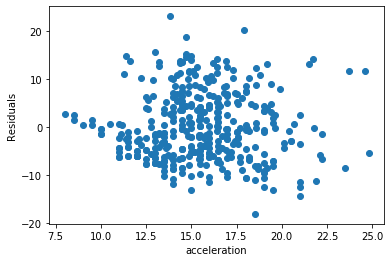

In [26]:
# Residuals plot
# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(y=error, x=data['acceleration'])
plt.ylabel('Residuals')
plt.xlabel('acceleration')

The residuals are more centered around zero and more homogeneously distributed across the values of x.

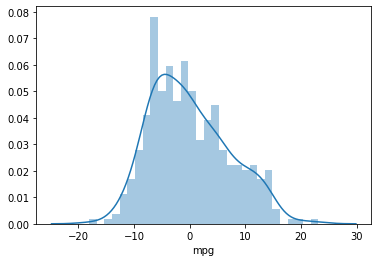

In [27]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)

The residuals are now more centered around zero than before the transformation.

## Multicolinearity

To determine co-linearity, we evaluate the correlation of all the independent variables in the dataframe.

(0, 5)

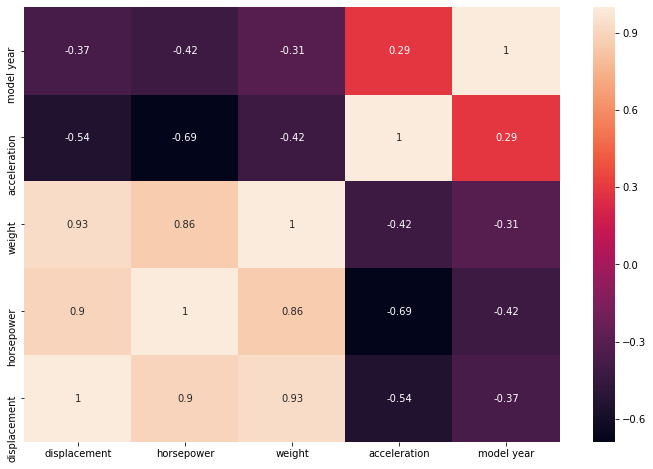

In [75]:
# we calculate the correlations using pandas corr
# and we round the values to 2 decimals
correlation_matrix = data[['displacement', 'horsepower', 'weight', 'acceleration', 'model year']].corr().round(2)

# plot the correlation matrix usng seaborn
# annot = True to print the correlation values
# inside the squares

figure = plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.ylim(0,5)

On the x and y axis of the heatmap we have the variables of the data dataframe. Within each square, the correlation value between those 2 variables is indicated. For example, for model year is not highly correlated to any other variable, the highest correlation is with horsepower: 0.42.

Instead, the variable horsepower is highly correlated to other variables, such as: weight (0.86) and displacement (0.90)


The correlation, or co-linearity between acceleration, weight and horsepower is quite obvious in the above scatter plot. So these variables are violating the assumption of no multi co-linearity.

What we would do is remove 2 of the 3 from the dataset before training the linear model.

the correlation can be calculated using VIF (variance_inflation_factor)

## Normality

We evaluate normality using histograms and Q-Q plots. I explain Q-Q plots a few cells below. 

Let's begin with histograms. If the variable is normally distributed, we should observe the typical Gaussian bell shape.

### Histograms

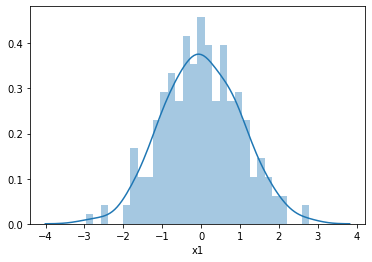

In [76]:
# histogram of the simulated independent variable x1
# which we know follows a Gaussian distribution

sns.distplot(df['x1'], bins=30)

This variable seems to follow a Normal distribution. it meets the assumption.

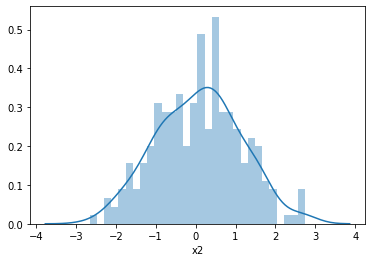

In [77]:
# histogram of the simulated independent variable x2
# which we know follows a Gaussian distribution

sns.distplot(df['x2'], bins=30)

This variable seems to follow a Normal distribution. it meets the assumption.

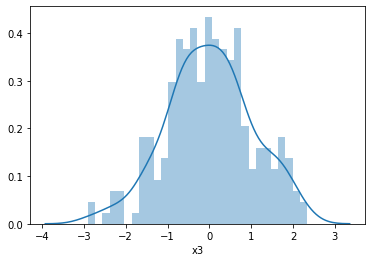

In [78]:
# histogram of the simulated independent variable x3
# which we know follows a Gaussian distribution

sns.distplot(df['x3'], bins=30)

This variable seems to follow a Normal distribution. it meets the assumption.

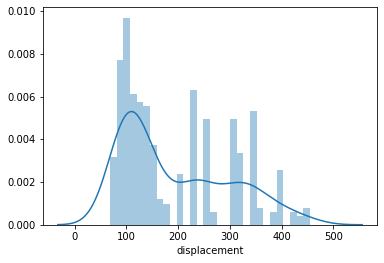

In [80]:
# histogram of the variable displacement 

sns.distplot(data['displacement'], bins=30)

displacement is skewed. Let's see if a transformation fixes this.

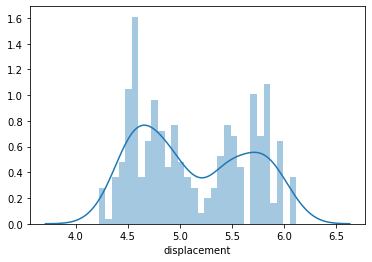

In [81]:
# histogram of the variable displacement 

sns.distplot(np.log(data['displacement']), bins=30)

The distribution is not normal either. We could go ahead and try other transformations. I will say more on this in a dedicated section.

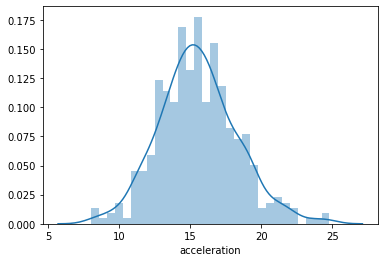

In [86]:
# histogram of the variable displacement 

sns.distplot(data['acceleration'], bins=30)

This variable seems to follow a Normal distribution. it meets the assumption.

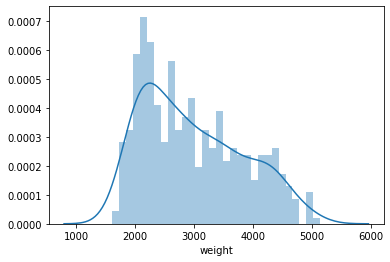

In [92]:
# histogram of the variable displacement 

sns.distplot(data['weight'], bins=30)

The distribution is not normal, weight is skewed

### Q-Q plots

In a Q-Q plot, the quantiles of the variable are plotted on the vertical axis (y), and the quantiles of a specified probability distribution (Gaussian distribution) are indicated on the horizontal axis (x). The plot consists of a series of points that show the relationship between the quantiles of the real data and the quantiles of the specified probability distribution. If the values of a variable perfectly match the specified probability distribution (i.e., the normal distribution), the points on the graph will form a 45 degree line. See below.

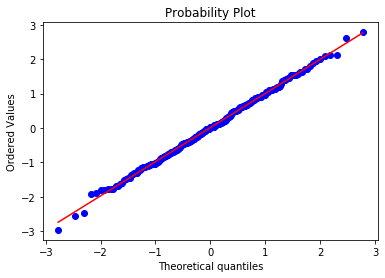

In [89]:
# let's plot the Q-Q plot for the simualted data.
# the dots should adjust to the 45 degree line

stats.probplot(df['x1'], dist="norm", plot=pylab)
pylab.show()

And they do. This is how a normal distribution looks like in a Q-Q plot.

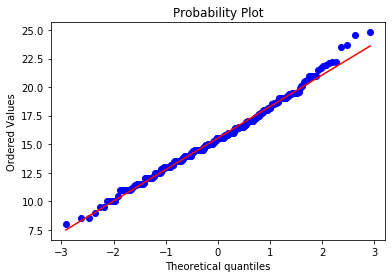

In [90]:
# let's do the same for acceleration
stats.probplot(data['acceleration'], dist="norm", plot=pylab)
pylab.show()

Most of the points adjust to the 45 degree line. However, the values at right end of the distribution deviate from the line. This indicates that the distribution of acceleration is not perfectly Gaussian, but is close.

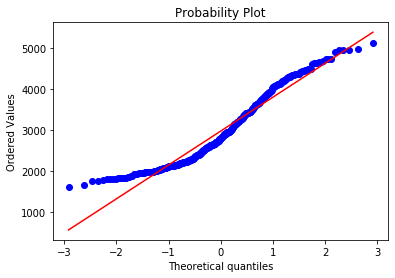

In [91]:
# let's do the same for acceleration
stats.probplot(data['weight'], dist="norm", plot=pylab)
pylab.show()

Many of the observations lie on the 45 degree red line following the expected quantiles of the theoretical Gaussian distribution, particularly towards the center of the plot. Some observations at the lower and upper end of the value range depart from the red line, which indicates that the variable weight is not normally distributed, as we rightly so in the histogram.

## Homocedasticity

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables.

The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs each one of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

There are other tests for homoscedasticity:

- Residuals plot
- Levene’s test
- Barlett’s test
- Goldfeld-Quandt Test

For this demo I will focus on residual plot analysis.

In [97]:
data.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'car name'],
      dtype='object')

In [98]:
inputs = data.drop(['mpg','car name'], axis = 1)
target = data.mpg

In [99]:
# to train and evaluate the model, let's first split into
# train and test data, using the variables of choice:

# let's separate into training and testing set
# using the sklearn function below

X_train, X_test, y_train, y_test = train_test_split(
    inputs,
    target,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 5), (118, 5), (274,), (118,))

In [103]:
# let's scale the features
# normal procedure for linear models

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [104]:
# model build using the natural distributions

# call the model
linreg = LinearRegression()

# train the model
linreg.fit(scaler.transform(X_train), y_train)

# make predictions on the train set and calculate
# the mean squared error
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# make predictions on the test set and calculate
# the mean squared error
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 11.354088350439863
Test set
Linear Regression mse: 12.450405579162705



Text(0, 0.5, 'Residuals')

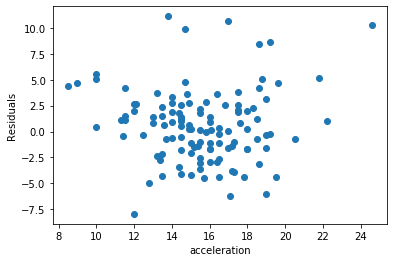

In [105]:
# calculate the residuals
error = y_test - pred

# plot the residuals vs one of the independent
# variables, acceleration in this case

plt.scatter(x=X_test['acceleration'], y=error)
plt.xlabel('acceleration')
plt.ylabel('Residuals')

The residuals seem fairly homogeneously distributed across the values of acceleration.

Text(0, 0.5, 'Residuals')

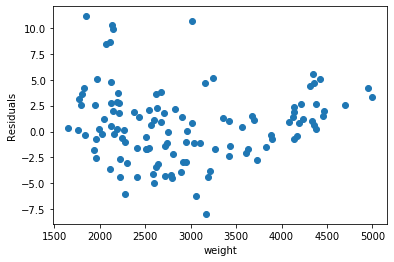

In [108]:
# calculate the residuals
error = y_test - pred

# plot the residuals vs one of the independent
# variables, acceleration in this case

plt.scatter(x=X_test['weight'], y=error)
plt.xlabel('weight')
plt.ylabel('Residuals')

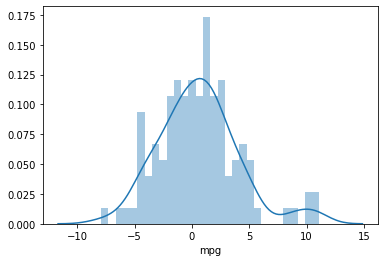

In [109]:
sns.distplot(error, bins=30)

The distribution of the residuals is fairly normal, but not quite, with more high values than expected towards the right end of the distribution.

## yellobricks

In [130]:
inputs_df = df.drop(['y'], axis = 1)
target_df = df.y



X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
    inputs_df,
    target_df,
    test_size=0.3,
    random_state=0)

X_train_df.shape, X_test_df.shape, y_train_df.shape, y_test_df.shape


((175, 3), (75, 3), (175,), (75,))

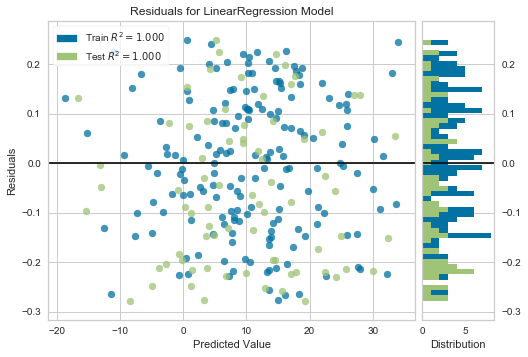

In [136]:
# now, we use yellobricks
# a library for visualisation of machine learning model 
# outcomes

# if you don't have yellowbricks installed, then install it: pip install yellowbrick

# yellowbricks allows you to visualise the residuals of the
# models after fitting a linear regression


from sklearn.linear_model import Ridge, Lasso

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection

linreg = LinearRegression()
linreg.fit(X_train_df, y_train_df)
visualizer = ResidualsPlot(linreg)

visualizer.fit(X_train_df, y_train_df)  # Fit the training data to the model
visualizer.score(X_test_df, y_test_df)  # Evaluate the model on the test data
visualizer.poof()


The errors are homogeneously distributed and centered around 0.

### Look at the R2's values in the yellowbricks residual plots are equal 1, perfect Homocedasticity!!!.

C:\Users\gusal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


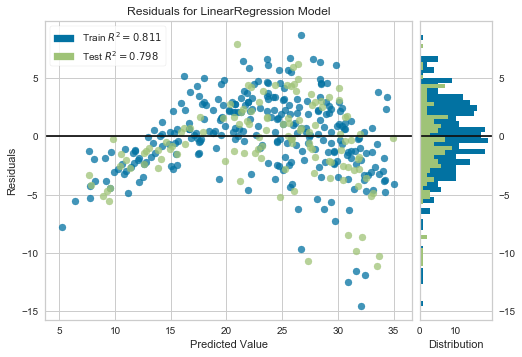

In [111]:
## now we do the same with data


from sklearn.linear_model import Ridge, Lasso

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

We see from the plot that the residuals are not homogeneously distributed across the predicted value and are not centered around zero either.